In [1]:
# This example demonstrates the creation of a biased Bell state using qstack.
# A biased Bell state is a variation of the standard Bell state where the probabilities of measurement outcomes are intentionally skewed.
from qstack.layers.toy import *
from qstack import Program, Stack, Kernel

# Create a stack using the toy layer.
stack = Stack.create(layer)

# Define a quantum program that allocates two qubits and entangles them with a bias.
program = Program(
    stack=stack,
    kernels=[
        Kernel.allocate(
            "q1",  # First qubit
            "q2",  # Second qubit
            compute=[
                Mix("q1", bias=0.8),  # Apply a biased mixing operation to the first qubit.
                Entangle("q1", "q2"),  # Entangle the first and second qubits.
            ],
        )
    ],
)

# Print the program to visualize its structure.
print(program)


@stack: toy

allocate q1 q2:
  mix(bias=0.8) q1
  entangle q1 q2
measure


In [2]:
# Set up a local quantum machine to execute the program.
# Each machine in qstack is created to target a specific stack or instruction set.
# This ensures that the machine can correctly interpret and execute the program's instructions.
from qstack.machine import local_machine_for

machine = local_machine_for(stack)


In [3]:
# Perform a single-shot execution of the program.
# A single-shot execution runs the program once and returns the measurement outcomes.
# This is useful for observing the result of a single execution of the quantum program.
machine.single_shot(program)


(0, 0)

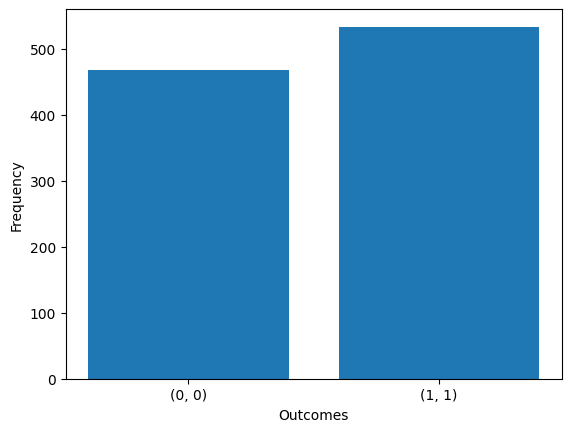

In [4]:
# Evaluate the program multiple times and plot the resulting histogram.
# This provides a statistical view of the biased Bell state.
machine.eval(program).plot_histogram()
